# Objectif 

- Reprendre l'apprentissage de la dernière séance.
- Elargir à d'autres modèles. (Regarder la partie régression de la documentation de `scikit-learn`).
- Utiliser `GridSearchCV` et `RandomSearchCV` pour sélectionner le meilleur modèle par cross validation. 

## Génération échantillon

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Variables globales
# Une seule cellule qui les contients
# Majuscules pour signaler leur aspect

NB_POINTS = 100
BRUIT = 0.1
A, B = -1.5, 3.

In [10]:
def cible(x) :
    return np.exp(1. / (2. + np.sin(5 * x) * np.cos(7 * x)))

In [3]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 

In [12]:
X = np.linspace(A, B, NB_POINTS)[:, np.newaxis]
#On change les dimensions (regarder la doc)
y = (cible(X) * (
    1 + np.random.uniform(
        low = -BRUIT,
        high = BRUIT,
        size = X.shape

    )
)).reshape((-1,))

In [13]:
X.shape


(100, 1)

In [14]:
y.shape

(100,)

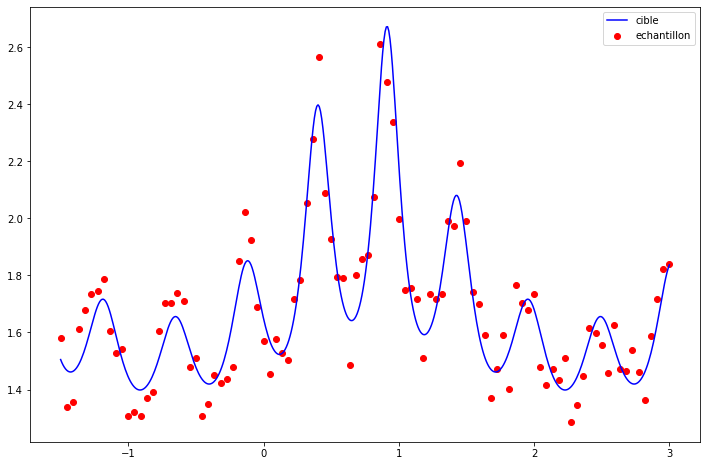

In [16]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label = "cible")
rep.scatter(X, y, color = "red", label = "echantillon")
rep.legend()

# Apprentissage

In [17]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

## Modèle polynomial

In [18]:
# Création des échantillons
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [19]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", LinearRegression()),
    ]
)

In [20]:
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', LinearRegression())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': LinearRegression(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__n_jobs': None,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False}

In [21]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
    },
)

In [22]:
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', LinearRegression())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__fit_intercept': [True, False]})

In [23]:
g.best_estimator_

Pipeline(steps=[('Norm', MinMaxScaler(feature_range=(-1.0, 1.0))),
                ('Poly', PolynomialFeatures(degree=5)),
                ('Reg', LinearRegression(fit_intercept=False))])

In [24]:
g.best_score_

0.06134848349286433

In [25]:
g.score(X_te, y_te)

0.3336006927603814

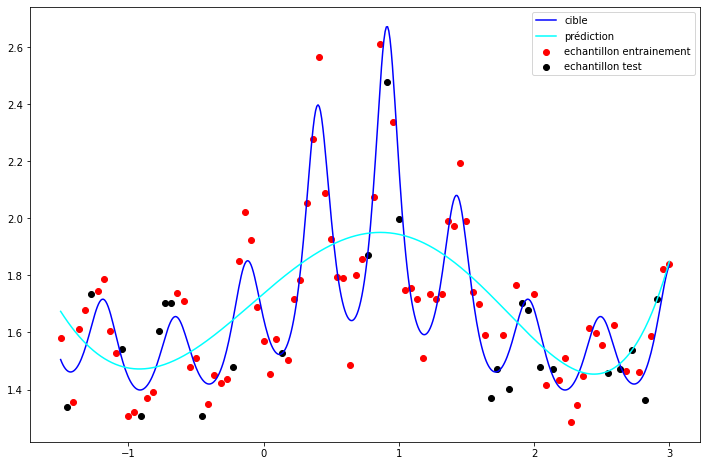

In [ ]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X_tr, y_tr, color="red", label="echantillon entrainement")
rep.scatter(X_te, y_te, color="black", label="echantillon test")
rep.plot(x_aff, g.predict(x_aff[:, np.newaxis]), color="cyan", label="prédiction")
rep.legend()

## Autres modèles

- Lasso, Ridge, ElasticNet
- SVM
- RandomForestRegressor
- Perceptron

In [27]:
resultat = dict()

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [30]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", Ridge()),
    ]
)

In [31]:
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', Ridge())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': Ridge(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__max_iter': None,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__random_state': None,
 'Reg__solver': 'auto',
 'Reg__tol': 0.001}

In [32]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.01, 0.1, 1., 10.],
        "Reg__solver": ["svd", "lsqr"],
    },
)

In [33]:
g.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', Ridge())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.01, 0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__solver': ['svd', 'lsqr']})

In [ ]:
g.best_estimator_

In [ ]:
g.best_score_

In [ ]:
resultats["Ridge"] = g

In [ ]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", Lasso()),
    ]
)
p.get_params()

In [ ]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.01, 0.1, 1., 10.],
        "Reg__max_iter": [10000],
    },
)
g.fit(X_tr, y_tr)

In [ ]:
resultats["Lasso"] = g

In [ ]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", ElasticNet()),
    ]
)
p.get_params()

In [ ]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.1, 1., 10.],
        "Reg__l1_ratio": [0.1, 0.5, 0.9],
        "Reg__max_iter": [10000],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

In [ ]:
resultats["Elastic Net"] = g

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [ ]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", SVR()),
    ]
)
p.get_params()

In [ ]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__C": [0.1, 1., 10.],
        "Reg__epsilon": [0.05, 0.1, 0.5],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

In [ ]:
resultats["SVR"] = g

In [ ]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", RandomForestRegressor()),
    ]
)
p.get_params()

In [ ]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 15, 2),
        "Reg__n_estimators": [50, 100, 150, 200],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

In [ ]:
resultats["RandomForest"] = g

In [ ]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", MLPRegressor()),
    ]
)
p.get_params()

In [ ]:
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 15, 2),
        'Reg__hidden_layer_sizes': [(100,), (50, 50), (25, 50, 25)],
        "Reg__max_iter": [5000],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

In [ ]:
resultats["Neural Network"] = g

In [ ]:
for modele, meilleur in resultats.items():
    print(f"{modele}: score={meilleur.best_score_}")

In [ ]:
choix = resultats["RandomForest"]

In [ ]:
choix.score(X_tr, y_tr)

In [ ]:
choix.score(X_te, y_te)

In [ ]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X_tr, y_tr, color="red", label="echantillon entrainement")
rep.scatter(X_te, y_te, color="black", label="echantillon test")
rep.plot(x_aff, choix.predict(x_aff[:, np.newaxis]), color="cyan", label="prédiction")
rep.legend()

In [1]:
from sklearn.datasets import (
    load_iris,
    load_digits,
)

In [3]:
from sklearn.dummy import DummyClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
)

In [10]:
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Etude d'IRIS

In [11]:
res = load_iris()

In [12]:
dir(res)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
res.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
res.data_module

'sklearn.datasets.data'

In [16]:
res.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
res.filename

'iris.csv'

In [18]:
res.frame

In [19]:
res.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
res.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

## Cross-Validation

In [57]:
c = LogisticRegression()

In [58]:
c.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## RandomForest 

**Hyper paramètres** :
- *Particularité* : **Nombre d'estimateur** 

Le reste des hyper paramètres sont assez communs aux autres mais c'est ce paramètre que l'on va faire varier en priorité. 
"[50, 100, 150, 200]" 

**MLP** : 
- **Hidden_layer_size** : Le paramètre à faire varier, une liste de tuple.

"[(200, ), (100, 100), (), ()]"
- **Max_iter** 
"[1000,]"

**SVC** : "Support vector machine" 
- On fait varier C (l'échantillon ?)


### Refaire l'exercice sur digits :

In [30]:
res = load_digits()

In [31]:
dir(res)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [32]:
res.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [33]:
res.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [34]:
res.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [35]:
res.target

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
res.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

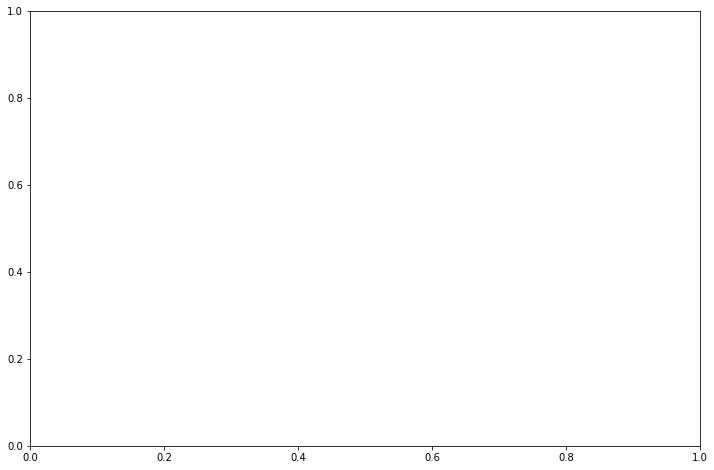

In [44]:
fig, rep = plt.subplots(figsize=(12, 8))

In [41]:
chiffres = load_digits()
X = chiffres.data
Y = chiffres.target

X.shape

(1797, 64)

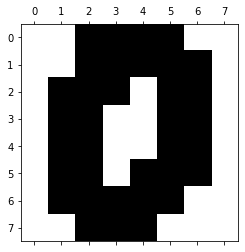

In [45]:
plt.spy(X[0].reshape((8,8)))

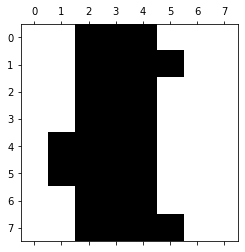

In [46]:
plt.spy(X[99].reshape((8,8)))

In [47]:
X_tr, X_te, y_tr, Y_te = train_test_split(X, Y)

## Cross-validation

In [50]:
# C'est une classe et ce que l'on veux c'est une instace de la classe !!
u = LogisticRegression()

In [51]:
u.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Reg", logistic()),
    ]
)

NameError: name 'MinMaxScaler' is not defined

In [62]:
g = GridSearchCV(
    u,
    {
        "fit_intercept": [True, False],
        "solver": [saga]
    }
)
g.fit(X_tr, y_tr)

NameError: name 'saga' is not defined